**Nguyễn Trọng Tín - Rio**

Note: Để dễ dàng khi thầy chạy và kiểm tra bài làm, em vẫn giữ nguyên các format khi đọc dữ liệu, thầy có thể unzip lại về path ban đầu trên máy để thực hiện chạy file.

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
!unzip "/content/drive/MyDrive/Data/data.csv.zip"

Archive:  /content/drive/MyDrive/Data/data.csv.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                y



# Load dữ liệu

In [134]:
data_df = pd.read_csv("data.csv")

data_df

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


In [135]:
feature_df = pd.read_csv("/content/drive/MyDrive/Data/featuresdf.csv")

feature_df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [136]:
#tạo thêm 1 cột "duration" qua giá ttrịcuar "duration_ms"
#np.round(...) - lam tron so int gan nhat
#feature_df["duration_ms"].values lấy giá trị trong cột "duration_ms"
feature_df["duration"] = np.round(feature_df["duration_ms"].values /1000)
feature_df

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.9310,95.977,233713.0,4.0,234.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.8130,88.931,228827.0,4.0,229.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.8460,177.833,228200.0,4.0,228.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.4460,103.019,247160.0,4.0,247.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.8110,80.924,288600.0,4.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,0.675,0.690,2.0,-4.761,1.0,0.1320,0.2100,0.000000,0.2870,0.2720,137.817,239293.0,4.0,239.0
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,0.542,0.859,11.0,-5.651,1.0,0.1970,0.1600,0.004660,0.1370,0.4030,159.797,208053.0,4.0,208.0
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,0.731,0.469,5.0,-7.226,1.0,0.0326,0.4630,0.000001,0.1030,0.6310,98.963,165387.0,4.0,165.0
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,0.658,0.588,6.0,-4.902,0.0,0.0367,0.1050,0.000001,0.1250,0.4340,110.075,214802.0,4.0,215.0


In [137]:
#Truy vấn trong data tại Position = 1 và Date = ....
data_df[(data_df["Position"]==1) & (data_df["Date"]=="2017-05-27")]

,Position,Track Name,Artist,Streams,URL,Date,Region
29200,1,Felices los 4,Maluma,34469,https://open.spotify.com/track/0qYTZCo5Bwh1nsU...,2017-05-27,ec
103400,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,232445,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,fr
177600,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,329911,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,ar
251800,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,141129,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,fi
326000,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,386475,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,no
400200,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,235059,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,it
453002,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,6175,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,lt
491199,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,207000,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,ph
565399,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,27440,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,tw
639599,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,81087,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,nz


# **Bài tập 1**: Tìm bài hát (track name) có stream lớn nhất.
---



In [138]:
#Kiểm tra giá trị max ở từng cột - nếu là string trả về theo thứ tự alphabet
#data_df.max()
data_df[["Position", "Streams", "Date", "Region"]].max()

,0
Position,200
Streams,11381520
Date,2018-01-09
Region,uy


In [139]:
data_df["Streams"].max()

11381520

In [140]:
#Trả về ngày stream có stream = max
#Công thức này sẽ trả về hàng có Streams cao nhất bất kể Date , nếu có Streams giống sẽ include
data_df[data_df["Streams"]==data_df["Streams"].max()]

,Position,Track Name,Artist,Streams,URL,Date,Region
3145443,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,11381520,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,global


# **Bài tập 2**: Tìm bài hát (track name) có stream lớn nhất theo ngày.


---



In [141]:
max_by_date = data_df.groupby('Date')['Streams'].max()
data_df

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


In [142]:
#Group lại data_df theo Streams cao nhất ở từng ngày riêng biệt
max_by_date = data_df.groupby('Date')['Streams'].max()

#Nếu ta ko reset_index, sẽ tạo ra một thứ tự bảng mới khác ban đầu sắp xếp theo position mới
max_by_date = max_by_date.reset_index()

#Chỉ hiển thị giữ lại cái Date và Stream thỏa điều kiện
data_df[(data_df['Date'].isin(max_by_date['Date']))
& (data_df['Streams'].isin(max_by_date['Streams']))]


,Position,Track Name,Artist,Streams,URL,Date,Region
782222,1,Shape of You,Ed Sheeran,1575915,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-02-23,us
784422,1,Shape of You,Ed Sheeran,2069243,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-03-06,us
3116643,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,global
3116843,1,Starboy,The Weeknd,3342769,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-02,global
3117043,1,Starboy,The Weeknd,3563076,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-03,global
...,...,...,...,...,...,...,...
3189443,1,rockstar,Post Malone,4346638,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-05,global
3189643,1,rockstar,Post Malone,4208156,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-06,global
3189843,1,rockstar,Post Malone,3814379,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-07,global
3190043,1,rockstar,Post Malone,4062918,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-08,global


In [143]:
#Tạo 1 bảng max_stream để tìm các giá trị Stream max cho từng ngày
max_stream= data_df.groupby('Date')['Streams'].max()
#Kết bảng "max_stream" và "data_df" để giữa lại những giá trị trùng trên cột Date và Streams --> Hiển thị Date, Track Name và Streams
data_df.merge(max_stream, how='inner', on=['Date','Streams'])[['Date','Track Name','Streams']]

,Date,Track Name,Streams
0,2017-02-23,Shape of You,1575915
1,2017-03-06,Shape of You,2069243
2,2017-01-01,Starboy,3135625
3,2017-01-02,Starboy,3342769
4,2017-01-03,Starboy,3563076
...,...,...,...
366,2018-01-05,rockstar,4346638
367,2018-01-06,rockstar,4208156
368,2018-01-07,rockstar,3814379
369,2018-01-08,rockstar,4062918


In [144]:
#Hiển thị ngày có Streams cao nhất - Unique day --> Sử dụng max() nếu ta chỉ cần tìm giá trị max
data_df.groupby(["Date"])["Streams"].max()

,Streams
Date,
2017-01-01,3135625
2017-01-02,3342769
2017-01-03,3563076
2017-01-04,3619247
2017-01-05,3579206
...,...
2018-01-05,4346638
2018-01-06,4208156
2018-01-07,3814379


In [145]:
data_df.groupby(["Date"])["Streams"].idxmax() #--> Sử dụng idxmax để tìm chính xác giá trị max nằm ở đâu

,Streams
Date,
2017-01-01,3116643
2017-01-02,3116843
2017-01-03,3117043
2017-01-04,3117243
2017-01-05,3117443
...,...
2018-01-05,3189443
2018-01-06,3189643
2018-01-07,3189843


In [146]:
data_df.loc[data_df.groupby(["Date"])["Streams"].idxmax()] #--> sử dụng .loc để trả về các cột ban đầu
#Khi này sử dụng .max sẽ sai do lỗi khi kết bảng --> như SQL

,Position,Track Name,Artist,Streams,URL,Date,Region
3116643,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,global
3116843,1,Starboy,The Weeknd,3342769,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-02,global
3117043,1,Starboy,The Weeknd,3563076,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-03,global
3117243,1,Starboy,The Weeknd,3619247,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-04,global
3117443,1,Starboy,The Weeknd,3579206,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-05,global
...,...,...,...,...,...,...,...
3189443,1,rockstar,Post Malone,4346638,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-05,global
3189643,1,rockstar,Post Malone,4208156,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-06,global
3189843,1,rockstar,Post Malone,3814379,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-07,global
3190043,1,rockstar,Post Malone,4062918,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-08,global


In [147]:
#Missing rows with max streams
d = {'Date': [1,3,3], 'Streams': [3, 4, 4]}

# index - date - streams
# 0 - 1 - 3
# 1 - 3 - 4
# 2 - 3 - 4
# --> Trả về index đầu của Date 1 tại index 0 và Date 3 tại index 1

df = pd.DataFrame(data=d)
df.groupby(["Date"])["Streams"].idxmax()
#Sử dụng phương thức trên để xác định vị trí chính xác - index value của cặp/thuộc tính max đầu tiên của bảng

,Streams
Date,
1,0
3,1


In [148]:
#Group data_df lại theo Date sau đó chọn để thao tác trên Streams
#Sử dụng transform('max") để tìm ra Stream max của từng ngày
data_df.groupby(["Date"])["Streams"].transform('max')

,Streams
0,3135625
1,3135625
2,3135625
3,3135625
4,3135625
...,...
3441192,4139989
3441193,4139989
3441194,4139989
3441195,4139989


In [149]:
data_df[data_df["Streams"] == data_df.groupby(["Date"])["Streams"].transform('max') ].sort_values(by="Date")

,Position,Track Name,Artist,Streams,URL,Date,Region
3116643,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,global
3116843,1,Starboy,The Weeknd,3342769,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-02,global
3117043,1,Starboy,The Weeknd,3563076,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-03,global
3117243,1,Starboy,The Weeknd,3619247,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-04,global
3117443,1,Starboy,The Weeknd,3579206,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-05,global
...,...,...,...,...,...,...,...
3189443,1,rockstar,Post Malone,4346638,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-05,global
3189643,1,rockstar,Post Malone,4208156,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-06,global
3189843,1,rockstar,Post Malone,3814379,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-07,global
3190043,1,rockstar,Post Malone,4062918,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2018-01-08,global


# Bài 2b. Biểu đồ danh sách các nghệ sĩ có từ 2 bài hát đạt top


In [150]:
artist_count_df = feature_df.groupby(["artists"])["artists"].agg(['count'])
artist_count_df

,count
artists,
21 Savage,1
AJR,1
Alessia Cara,1
Alok,1
Ariana Grande,1
...,...
Travis Scott,1
Wisin,1
ZAYN,2


In [151]:
artist_count_df = artist_count_df[artist_count_df["count"] >=2].sort_values(by=["count"])
artist_count_df

,count
artists,
Bruno Mars,2
Calvin Harris,2
Clean Bandit,2
DJ Khaled,2
Imagine Dragons,2
Kendrick Lamar,2
Khalid,2
Luis Fonsi,2
Maroon 5,2


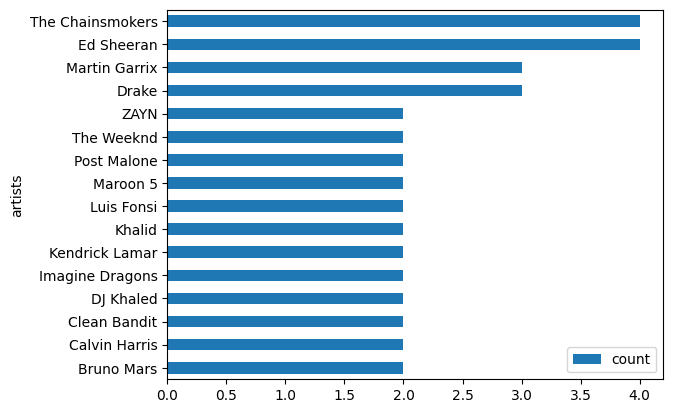

In [152]:
ax = artist_count_df.plot.barh(use_index=True, y='count')

# Biểu đồ lượng streams của các top song theo ngày



In [153]:
#Biểu đồ theo ngày (Ví dụ: lấy 10 ngày đầu tiên)
total_stream_by_date_df = data_df.groupby(["Date"])["Streams"].agg(["sum"]).iloc[0:10]

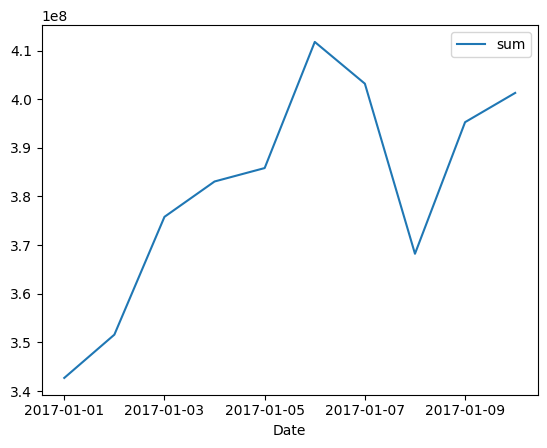

In [154]:
ax = total_stream_by_date_df.plot.line(use_index=True, y='sum')

In [155]:
data_df["Date"].describe()

,Date
count,3441197
unique,371
top,2017-12-24
freq,10073


# Bài tập 3: Biểu đồ lượng streams của các top song theo tháng

In [156]:
data_df["month"] = data_df["Date"].apply(lambda x: x[0:7])
data_df

,Position,Track Name,Artist,Streams,URL,Date,Region,month
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,2017-01
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec,2017-01
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec,2017-01
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec,2017-01
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec,2017-01
...,...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk,2018-01
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk,2018-01
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk,2018-01
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk,2018-01


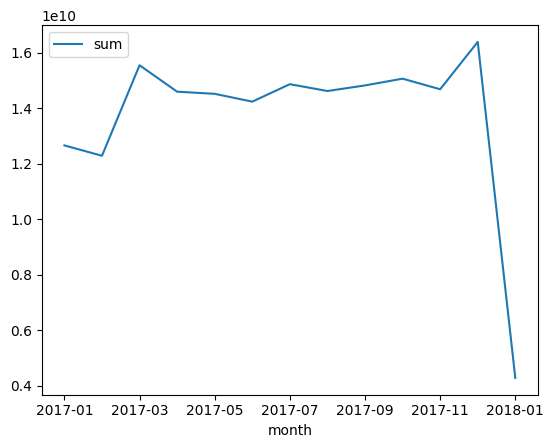

In [157]:
total_stream_by_date_df = data_df.groupby(["month"])["Streams"].agg(["sum"])
ax = total_stream_by_date_df.plot.line(use_index=True, y='sum')


# Bài tập 4: Vẽ biểu đồ top 20 bài hát có lượng play time cao nhất ở Mỹ (Region == "us")
Lưu ý: Play time = Streams * duration

In [158]:
#count stream
total_stream_df = data_df[data_df.Region == "us"].groupby(["Track Name"])["Streams"].agg(["sum"])
total_stream_df.rename(columns={"sum":"total_streams"},inplace=True)

playtime_df = feature_df.set_index(["name"]).join(total_stream_df,how="left")
playtime_df["play_time"] = (playtime_df["duration"].values * playtime_df["total_streams"].values)/86400
playtime_df


,id,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,duration,total_streams,play_time
name,,,,,,,,,,,,,,,,,,
Shape of You,7qiZfU4dY1lWllzX7mPBI,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.9310,95.977,233713.0,4.0,234.0,282319891.0,764616.371458
Despacito - Remix,5CtI0qwDJkDQGwXD1H1cL,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.8130,88.931,228827.0,4.0,229.0,235012075.0,622890.800637
Despacito (Featuring Daddy Yankee),4aWmUDTfIPGksMNLV2rQP,Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.8460,177.833,228200.0,4.0,228.0,94972759.0,250622.558472
Something Just Like This,6RUKPb4LETWmmr3iAEQkt,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.4460,103.019,247160.0,4.0,247.0,145168696.0,415007.730463
I'm the One,3DXncPQOG4VBw3QHh3S81,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.8110,80.924,288600.0,4.0,289.0,206524898.0,690806.661134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bad Things (with Camila Cabello),1PSBzsahR2AKwLJgx8ehB,Machine Gun Kelly,0.675,0.690,2.0,-4.761,1.0,0.1320,0.2100,0.000000,0.2870,0.2720,137.817,239293.0,4.0,239.0,65975364.0,182501.296250
Don't Let Me Down,0QsvXIfqM0zZoerQfsI9l,The Chainsmokers,0.542,0.859,11.0,-5.651,1.0,0.1970,0.1600,0.004660,0.1370,0.4030,159.797,208053.0,4.0,208.0,52637955.0,126721.002778
Body Like A Back Road,7mldq42yDuxiUNn08nvzH,Sam Hunt,0.731,0.469,5.0,-7.226,1.0,0.0326,0.4630,0.000001,0.1030,0.6310,98.963,165387.0,4.0,165.0,172818841.0,330035.981076


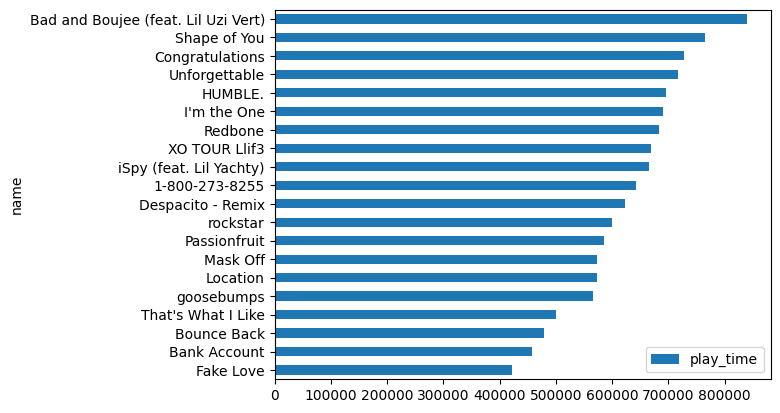

In [159]:
top20_df = playtime_df.nlargest(20,["play_time"])[["play_time"]]

play_time_ax = top20_df.sort_values(by=["play_time"],ascending=True).plot.barh(use_index=True, y='play_time')

# Bài tập 5: Số lần (số ngày) các bài hát của Ed Sheeran nằm trong top 100 ở Bảng xếp hạng Mỹ

In [160]:
#Tính các ngày từng bài của Ed Sheeran ở top 100
# group ed sheeran và us
ES_us = data_df[(data_df['Artist'] == 'Ed Sheeran') & (data_df['Region'] == 'us')]

# các bài hát thuộc top 100
top100_songs = ES_us[ES_us['Position'] <= 100]

# gom lại các track name và ngày của từng bài
unique_days = top100_songs.groupby(['Date', 'Track Name']).size().reset_index(name='Count')

# tính ngày unique của từng bài
unique_days = unique_days.groupby('Track Name')['Date'].count().reset_index()

unique_days.columns = ['Track Name', 'Unique Days Count']
print(unique_days)


                             Track Name  Unique Days Count
0                             Barcelona                 17
1                        Bibia Be Ye Ye                 14
2                    Castle on the Hill                104
3                                  Dive                 31
4                                Eraser                 14
5                           Galway Girl                 62
6                               Happier                 35
7        Hearts Don't Break Around Here                 15
8            How Would You Feel (Paean)                 20
9                        Nancy Mulligan                 16
10                              New Man                 22
11                              Perfect                148
12  Perfect Duet (Ed Sheeran & Beyoncé)                 39
13                           Photograph                  5
14                          Save Myself                 14
15                         Shape of You                3

In [161]:
# group ed sheeran và us
ES_us = data_df[(data_df['Artist'] == 'Ed Sheeran') & (data_df['Region'] == 'us')]

# các bài hát thuộc top 100
top100_songs = ES_us[ES_us['Position'] <= 100]

# chỉ tính các ngày riêng biệt - ko cần xử lý nhiều bài nhạc 1 ngày do đều là nhạc của Ed Sheeran
unique_days = top100_songs['Date'].unique()
totalcount = len(unique_days)

print(f"Tổng số ngày các bài hát của Ed Sheeran thuộc top 100 là: {totalcount}")

Tổng số ngày các bài hát của Ed Sheeran thuộc top 100 là: 366


# Bài tập 6: Vẽ biểu đồ diễn biến xếp hạng của bài Shape of you của tác giả Ed Sheeran trong top 100 ở Mỹ. Mở rộng: diễn biến các bài hát của Ed Sheeran trong top 100 ở Mỹ

<ipython-input-162-2a215a1252f4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shapeofyou_ed['Date'] = pd.to_datetime(shapeofyou_ed['Date'])


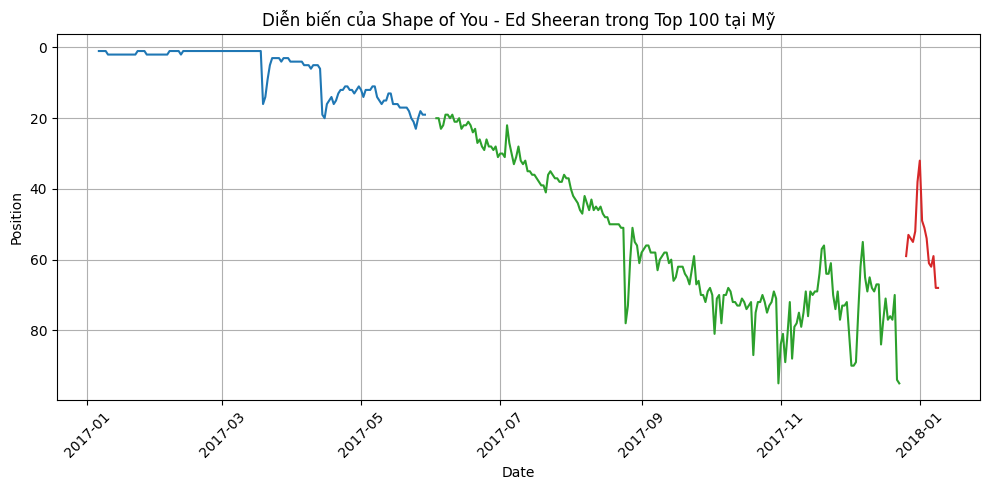

In [162]:
#Shape of You
#gom các cột theo yêu cầu
shapeofyou_ed = data_df[(data_df['Track Name'] == 'Shape of You') &
                        (data_df['Artist'] == 'Ed Sheeran') &
                        (data_df['Region'] == 'us') &
                        (data_df['Position'] <= 100)]

shapeofyou_ed['Date'] = pd.to_datetime(shapeofyou_ed['Date'])
shapeofyou_ed = shapeofyou_ed.sort_values('Date')

#Tạo 1 segment mới mỗi khi có 1 ngày out top
shapeofyou_ed['Date_diff'] = shapeofyou_ed['Date'].diff().dt.days
segments = (shapeofyou_ed['Date_diff'] > 1).cumsum()


#Vẽ chart theo từng segment
plt.figure(figsize=(10, 5))
for _, segment in shapeofyou_ed.groupby(segments):
    plt.plot(segment['Date'], segment['Position'], label='Shape of You', linestyle='-')

plt.gca().invert_yaxis()  # quay trục y
plt.title('Diễn biến của Shape of You - Ed Sheeran trong Top 100 tại Mỹ')
plt.xlabel('Date')
plt.ylabel('Position')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

<ipython-input-163-23b2d7ffcd77>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ed['Date'] = pd.to_datetime(ed['Date'])


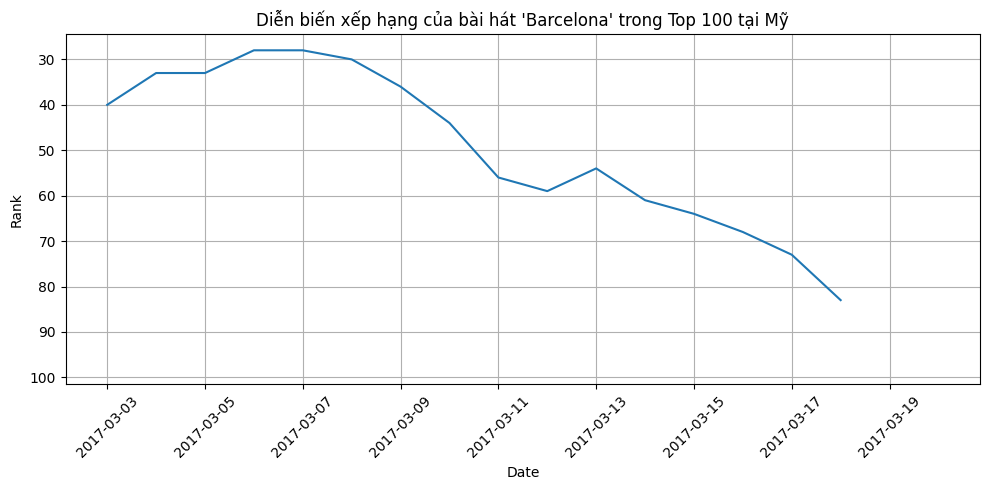

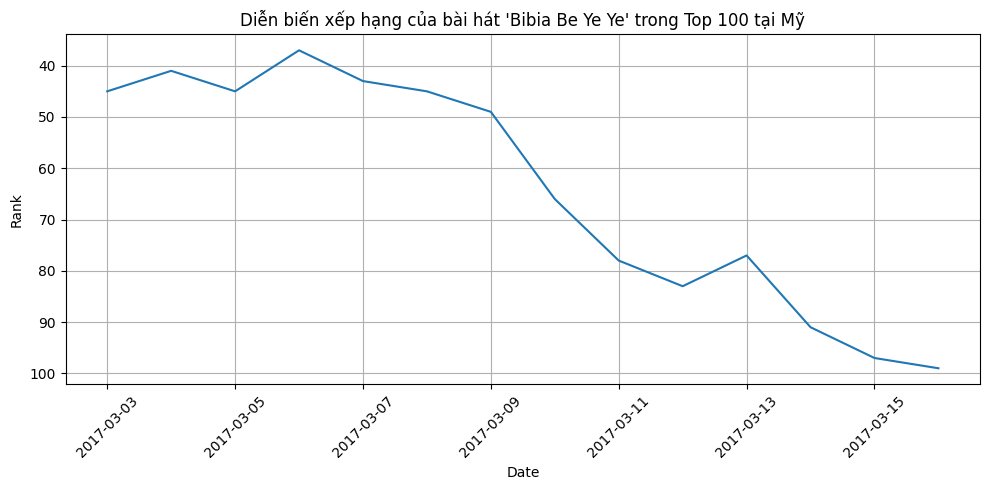

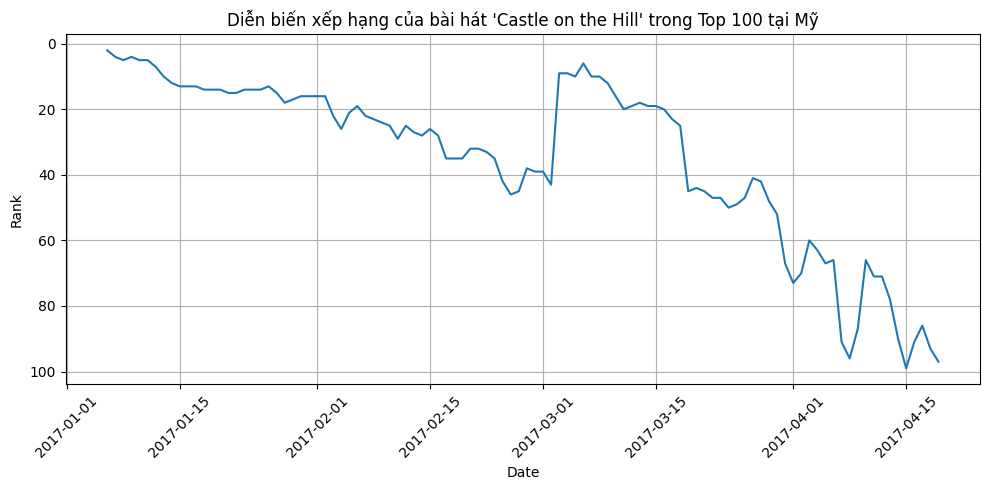

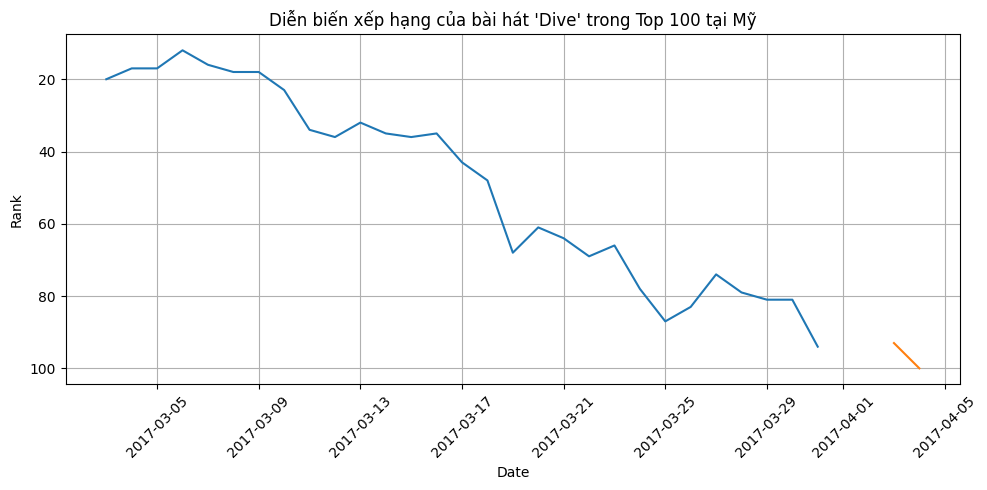

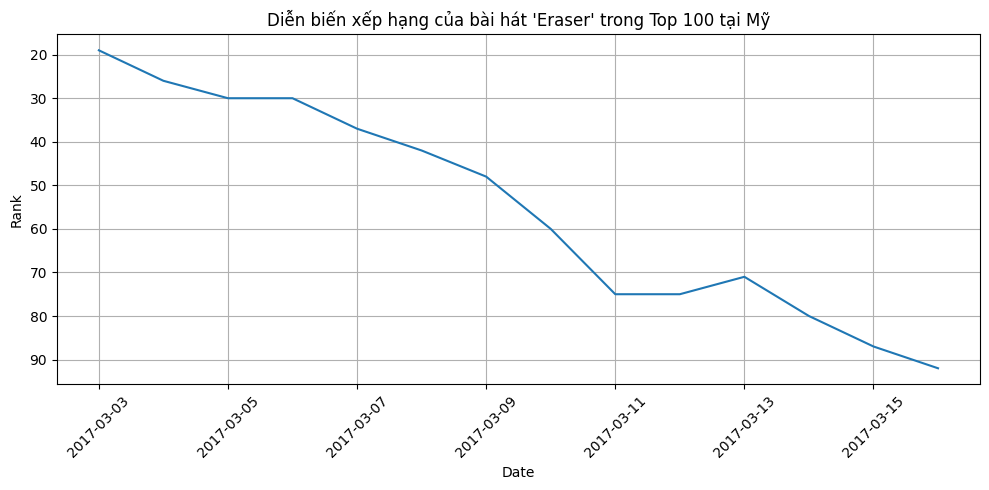

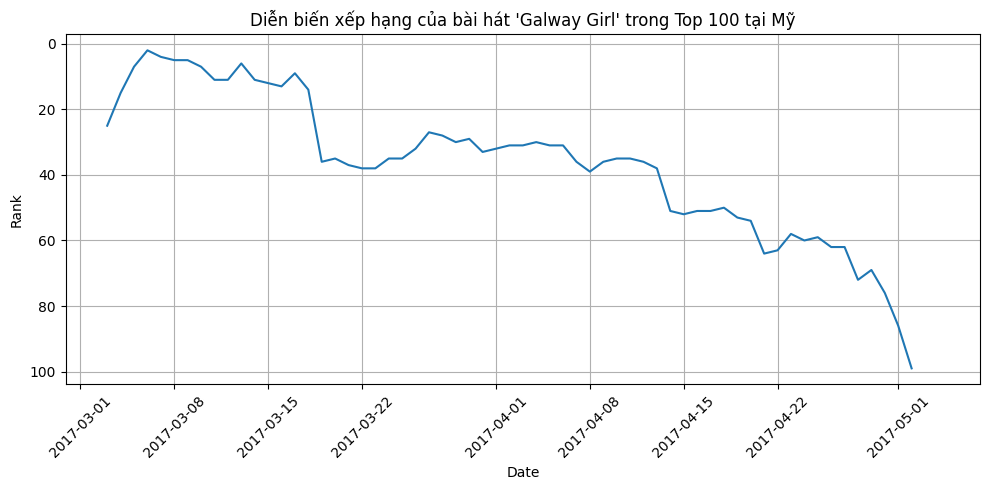

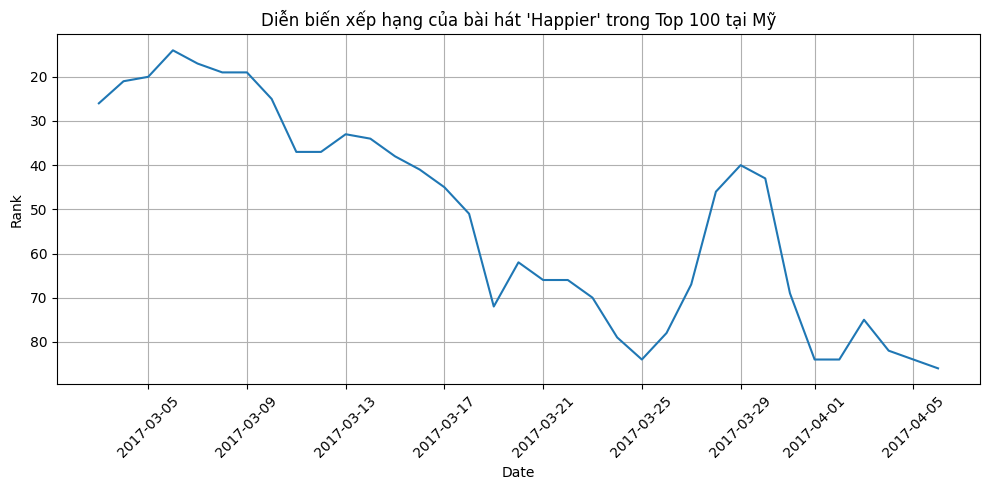

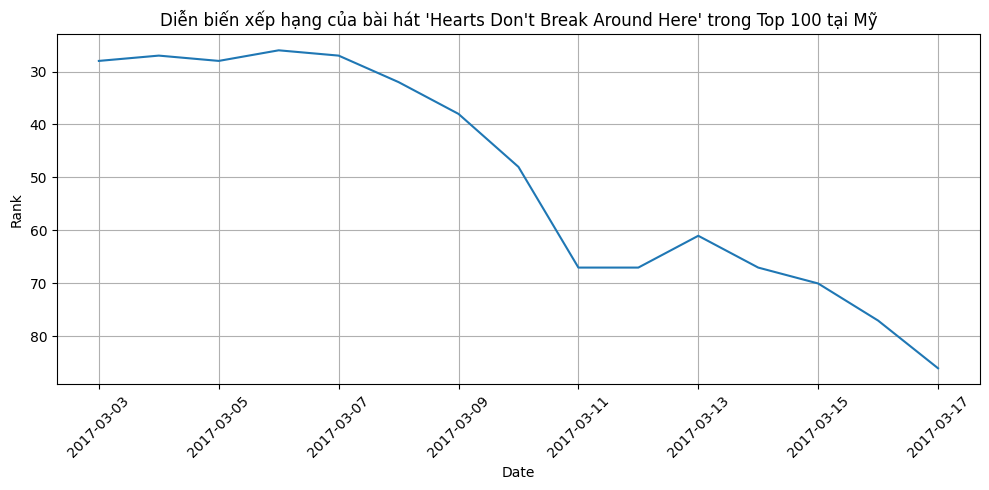

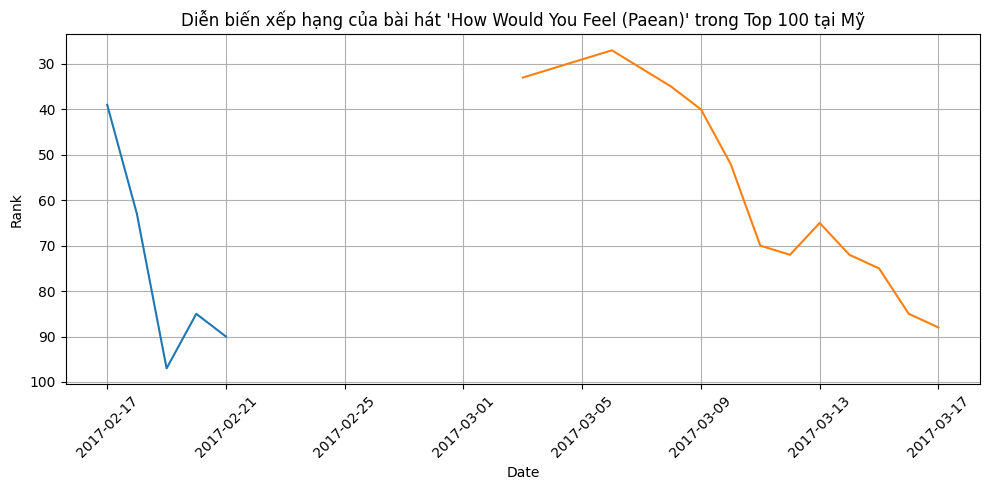

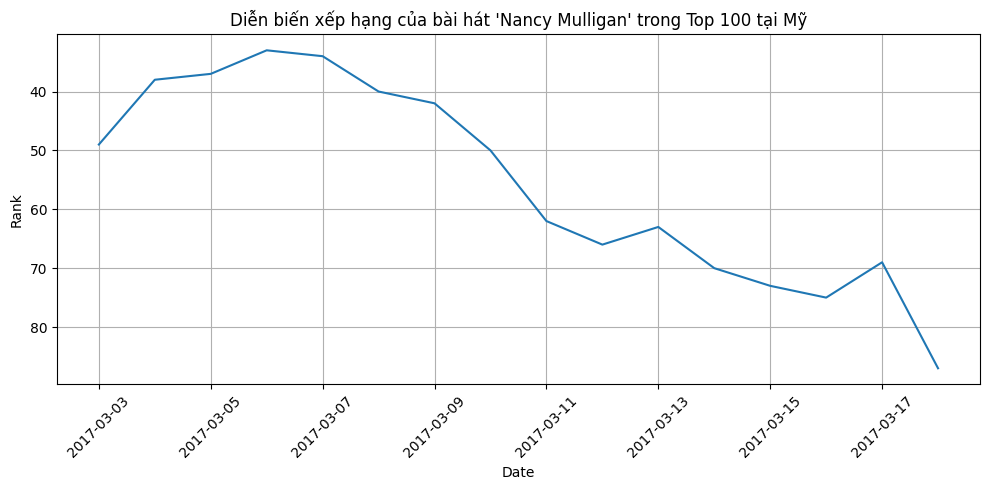

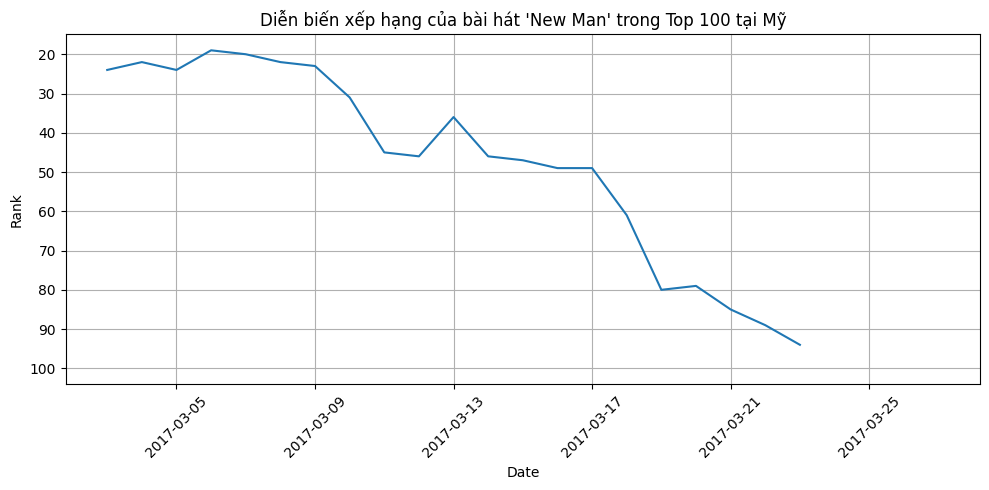

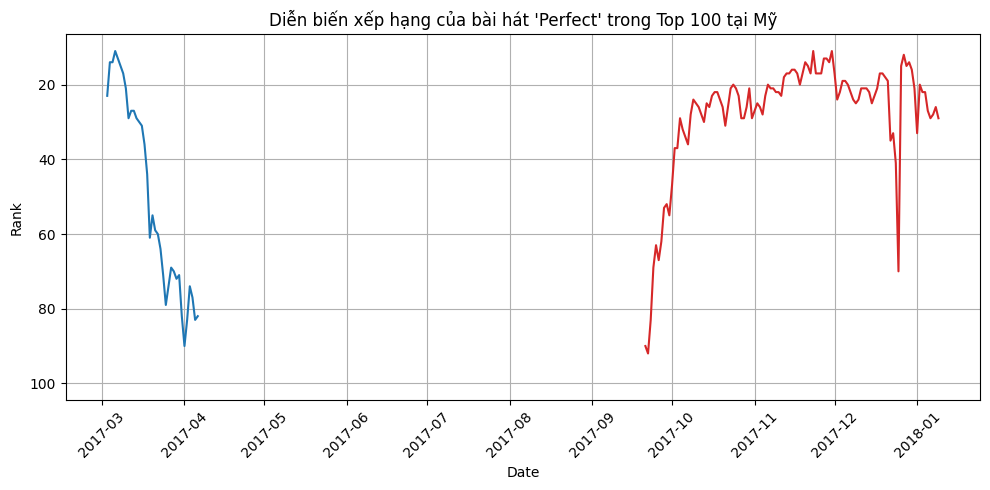

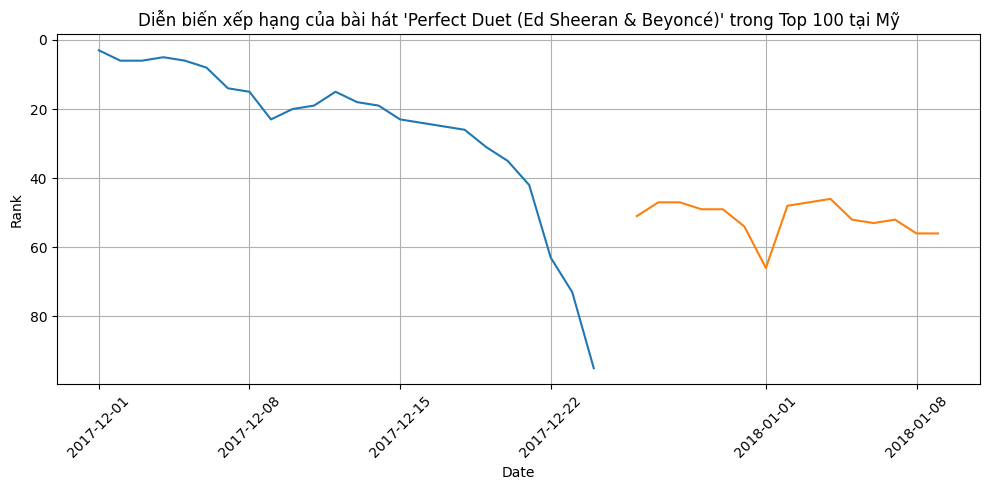

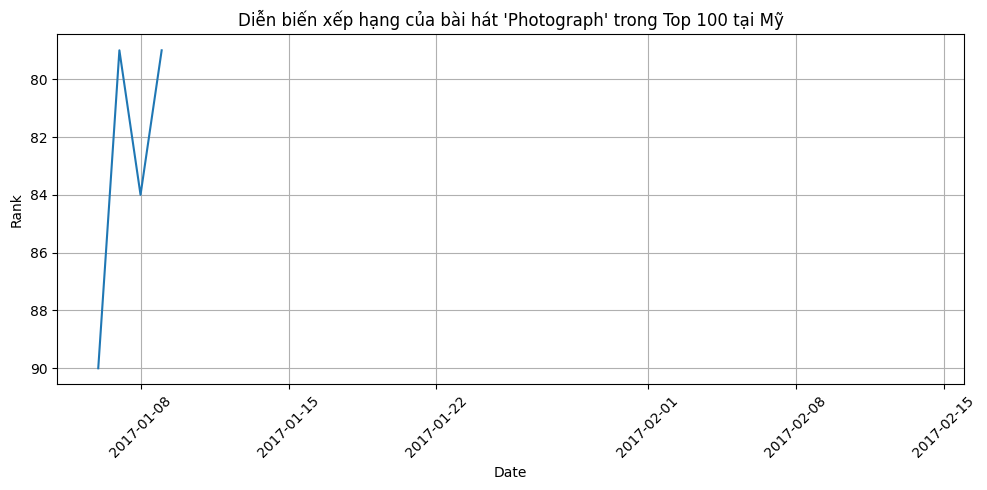

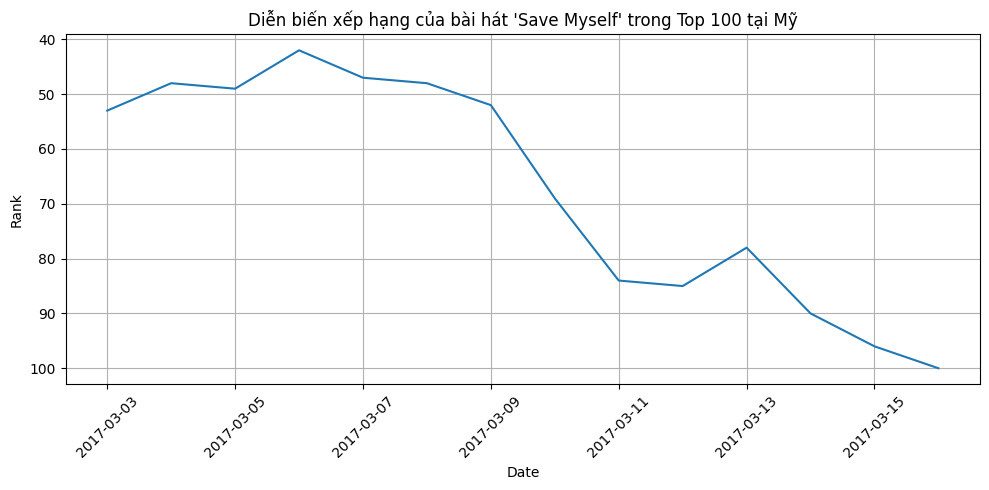

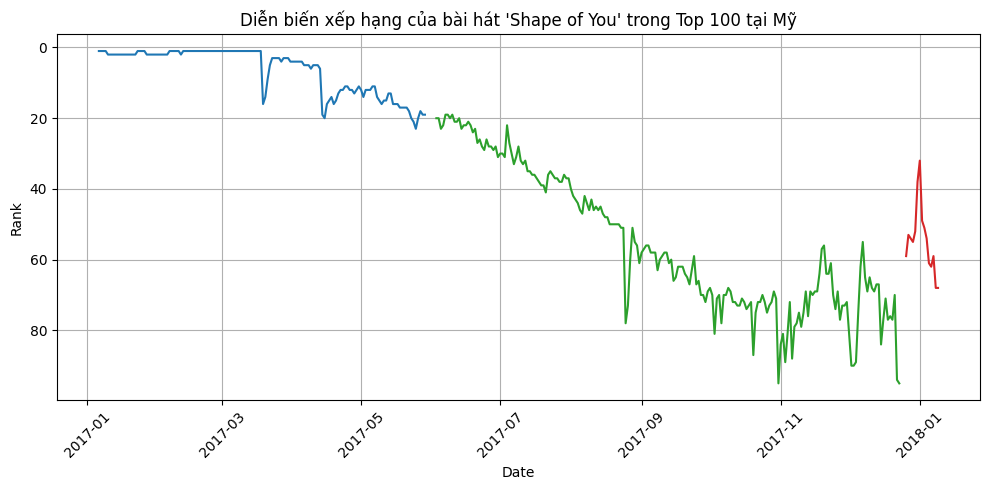

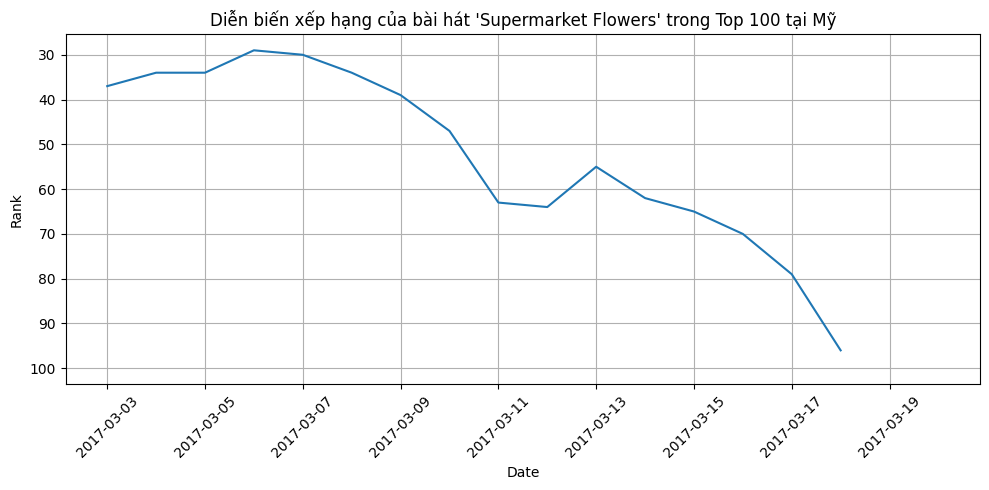

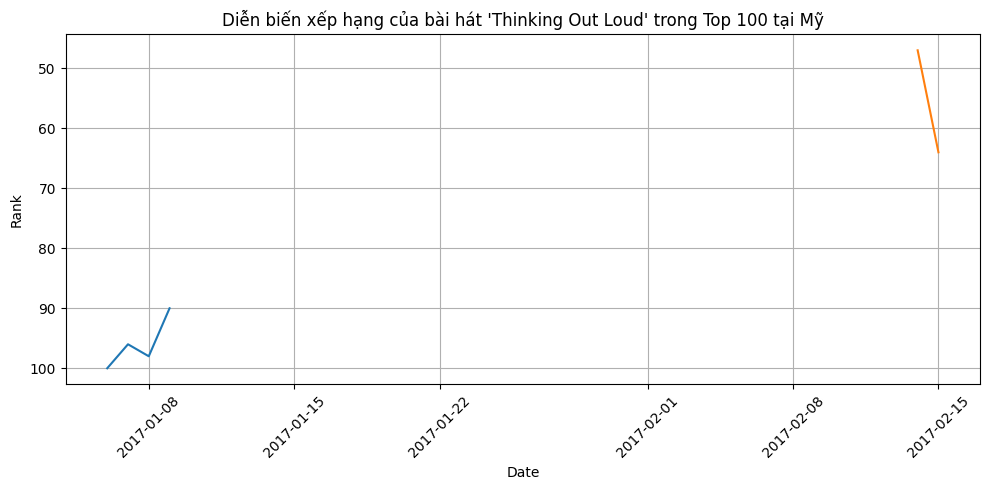

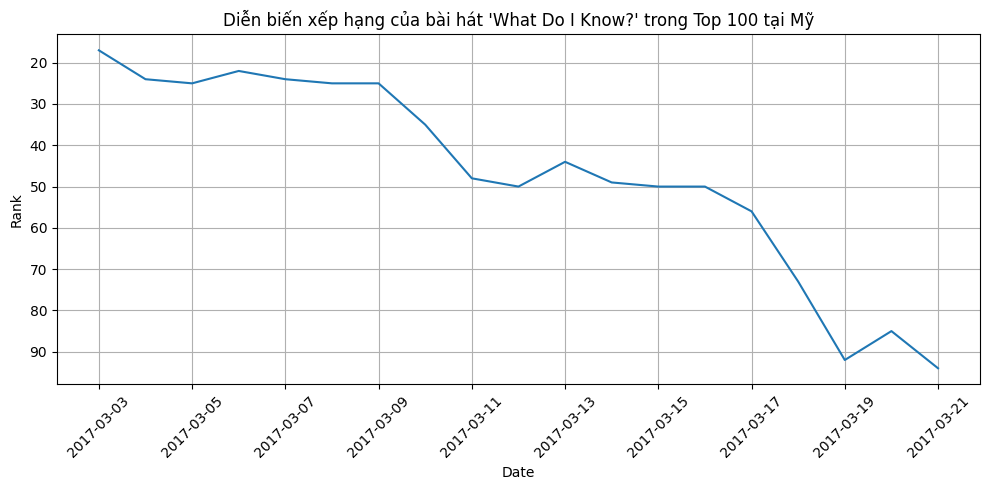

In [163]:
#Tất cả các bài hát của Ed Sheeran thuộc Top 100 tại Mỹ
ed = data_df[(data_df['Artist'] == 'Ed Sheeran') &
             (data_df['Region'] == 'us') &
             (data_df['Position'] <= 100)]

ed['Date'] = pd.to_datetime(ed['Date'])
ed = ed.sort_values('Date')

for track_name, group in ed.groupby('Track Name'):
    plt.figure(figsize=(10, 5))

    # Segment cho từng đoạn thời gian
    group['Date_diff'] = group['Date'].diff().dt.days
    segments = (group['Date_diff'] > 1).cumsum()
    for _, segment in group.groupby(segments):
        plt.plot(segment['Date'], segment['Position'], linestyle='-')


    plt.gca().invert_yaxis()
    plt.title(f"Diễn biến xếp hạng của bài hát '{track_name}' trong Top 100 tại Mỹ")
    plt.xlabel('Date')
    plt.ylabel('Rank')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.show()


# Bài tập 7: Sử dụng PCA để biểu diễn các bài hát bằng biểu đồ scatter (dùng dữ liệu featuresdf). So sánh với việc sử dụng TSNE để giảm chiều (giải thích các tham số trong TSNE)

Original Data:
                      id                                name  \
0  7qiZfU4dY1lWllzX7mPBI                        Shape of You   
1  5CtI0qwDJkDQGwXD1H1cL                   Despacito - Remix   
2  4aWmUDTfIPGksMNLV2rQP  Despacito (Featuring Daddy Yankee)   
3  6RUKPb4LETWmmr3iAEQkt            Something Just Like This   
4  3DXncPQOG4VBw3QHh3S81                         I'm the One   

            artists  danceability  energy   key  loudness  mode  speechiness  \
0        Ed Sheeran         0.825   0.652   1.0    -3.183   0.0       0.0802   
1        Luis Fonsi         0.694   0.815   2.0    -4.328   1.0       0.1200   
2        Luis Fonsi         0.660   0.786   2.0    -4.757   1.0       0.1700   
3  The Chainsmokers         0.617   0.635  11.0    -6.769   0.0       0.0317   
4         DJ Khaled         0.609   0.668   7.0    -4.284   1.0       0.0367   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0        0.5810          0.000000    0.09

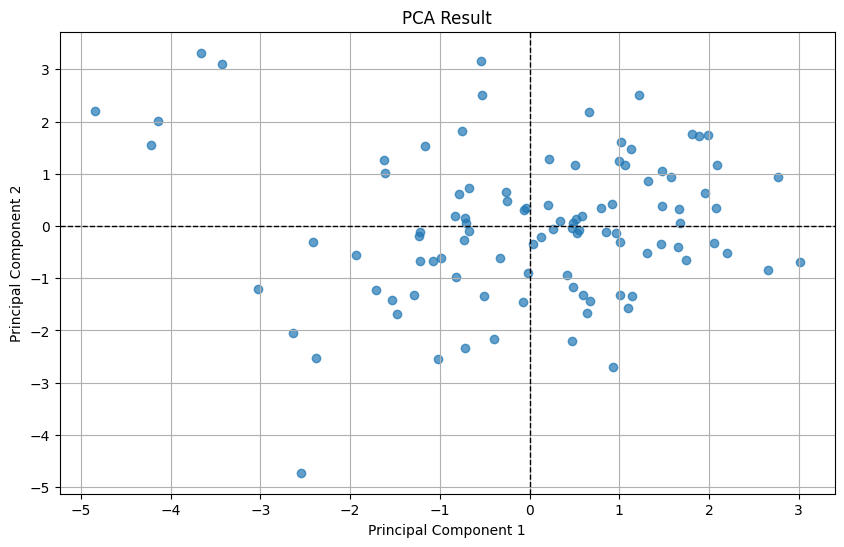

Tỉ lệ phương sai: [0.17884918 0.13725572]
Tổng phương sai: 0.31610490262202573


In [164]:
# PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Dữ liệu feature ban đầu
print("Original Data:")
print(feature_df.head())

# Chỉ giữ lại các thuộc tính chứa số
numeric_features = feature_df.select_dtypes(include=[np.number])  # Select only numeric columns

# Shape dữ liệu ban đầu
print(f"Data Shape ban đầu: {numeric_features.shape}")

# Chuẩn hóa các thuộc tính
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_features)

# PCA - Giảm chiều dữ liệu về 2 để biểu diễn
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Giá trị PCA sau xử lý
print("\nData sau PCA:")
print(pca_df.head())
print(f"PCA Shape: {pca_df.shape}")

# PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.7)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.show()

# Phương sai
explained_variance = pca.explained_variance_ratio_
print(f'Tỉ lệ phương sai: {explained_variance}')
print(f'Tổng phương sai: {np.sum(explained_variance)}')

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


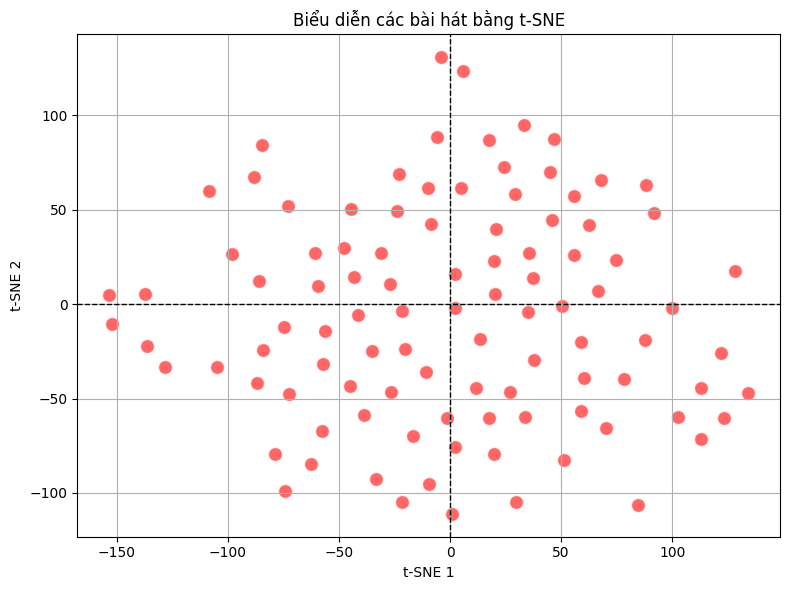

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

X = feature_df.drop(columns=['id', 'name', 'artists'])  # drop các cột chữ
#Chuần hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Giảm chiều với t-SNE
perplexity = 30  # - Được dùng để xác định độ phức tạp của các điểm dữ liệu - Với perplexity thấp, sẽ gom các phân vùng gần các điểm ban đầu hơn , perlexity càng cao sẽ gom vùng bự hơn
learning_rate = 500  # Tốc độ học dùng để xem xét và phân cụm lại các điểm dữ liệu, tùy chỉnh dựa vào kết quả trả về
n_iter = 1000  # Số vòng lặp để học
random_state = 42  #  Sinh lại các bộ ngẫu nhiên

tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate,
            n_iter=n_iter, random_state=random_state)

X_tsne = tsne.fit_transform(X_scaled)

# 4. Vẽ biểu đồ scatter với màu sắc theo tên bài hát
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='red', alpha=0.6, edgecolors='w', s=100)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.axvline(0, color='black', linewidth=1, linestyle='--')

plt.title("Biểu diễn các bài hát bằng t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")

plt.grid()
plt.tight_layout()
plt.show()

# # Thêm chú thích cho điểm
# for i, row in feature_df.iterrows():
#     plt.annotate(row['name'], (X_tsne[i, 0], X_tsne[i, 1]), fontsize=8, alpha=0.7)

# Hiển thị biểu đồ



**Tổng kết**

Qua khảo sát, ta nhận thấy khi sử dụng **PCA**, ta tiếp cận các điểm dữ liệu với tính toán các ma trận và vectow riêng của từng thuộc tính để tính phương sai và tạo ra các cặp không gian tuyến tính mới trong khi với **t-SNE**, tùy vào mức độ ta tinh chỉnh các tham số và bản chất t-SNE chỉ gom cụm lại các điểm dữ liệu nên ta vẫn có thể xem xét lại được sự tương đồng/liên quan của các điểm dữ liệu ban đầu

Ngoài ra, **t-SNE** còn có thể biểu diễn dữ liệu trên các chiều 3-D để trực quan hóa hơn tuy nhiên với tập dữ liệu lớn **t-SNE** cần nhiều tài nguyên và thời gian hơn để tính toán còn PCA có thể giảm chiều nhanh chóng mà không bị ảnh hưởng nhiều bởi các tham số.